In [1]:
import nevis
import scipy
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
nevis.download_os_terrain_50()

Downloaded, unpacked, and processed file already found: Skipping.


In [2]:
f = nevis.linear_interpolant()

In [9]:
x_max, y_max = nevis.dimensions()
def make_pairs(s):
    xs = np.linspace(0, x_max, math.ceil(x_max / s))
    ys = np.linspace(0, y_max, math.ceil(y_max / s))

    # The Cartesian product of the two lists
    pairs = np.dstack(np.meshgrid(xs, ys)).reshape(-1, 2)

    return pairs

In [69]:
np.random.seed(1)

pairs = make_pairs(800)
result = [(f(x, y), x, y) for x, y in pairs]
result.sort(key=lambda x: x[0])

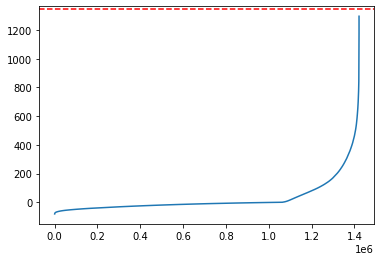

In [70]:
plt.plot([x[0] for x in result])
plt.axhline(y=1344.9, color='r', linestyle='--', label='Ben Nevis')
plt.show()

In [71]:
ben_x, ben_y = nevis.ben().grid
def dist_to_ben(x, y):
    return ((x - ben_x)**2 + (y - ben_y)**2) ** 0.5

In [72]:
distances = [dist_to_ben(x, y) for x, y in pairs]

In [73]:
distances.sort()
distances.reverse()

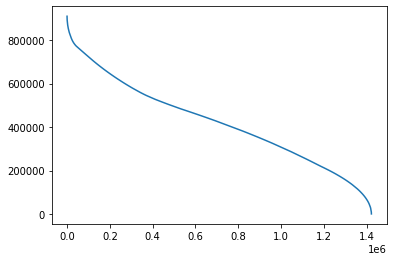

In [74]:
plt.plot(distances)
plt.show()

In [75]:
fs = [x[0] for x in result]

In [ ]:
random_results = []
for i in range(40):
    shuffled_f = np.random.permutation(fs)
    prefix_max = np.maximum.accumulate(shuffled_f)
    random_results.append(prefix_max)

random_results = np.array(random_results)

In [79]:
temp = random_results.T

In [82]:
re_mean = [x.mean() for x in temp]

In [86]:
re_25 = [np.quantile(x, 0.25) for x in temp]
re_75 = [np.quantile(x, 0.75) for x in temp]

In [92]:
re_max = np.max(fs)
re_best = np.array([re_max] * len(fs))

c:\Users\LLR User\Documents\EricSummer2022\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


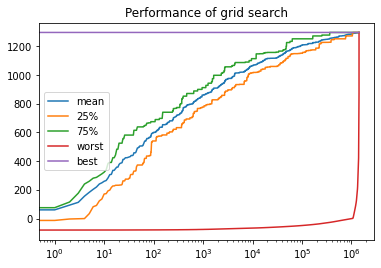

In [95]:
plt.xscale('log')
plt.plot(re_mean, label='mean')
plt.plot(re_25, label='25%')
plt.plot(re_75, label='75%')
plt.plot(fs, label='worst')
plt.plot(re_best, label='best')
plt.legend()
plt.title('Performance of grid search')
plt.show()

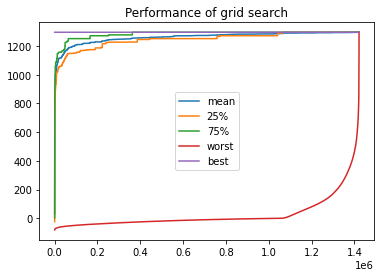

In [96]:
plt.plot(re_mean, label='mean')
plt.plot(re_25, label='25%')
plt.plot(re_75, label='75%')
plt.plot(fs, label='worst')
plt.plot(re_best, label='best')
plt.legend()
plt.title('Performance of grid search')
plt.show()